# Homework 2

# Part 1: 911 Calls Project

For this part you will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions using your Python and Data Science skills!

## Data and Setup

** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df=pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
df['Reason']=df['title'].str.split(':',expand=True)[0]
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [11]:
df['Reason'].value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

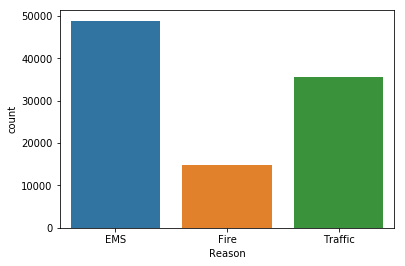

In [12]:
sns.countplot(df['Reason'])


** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [13]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [14]:
df['timeStamp']=pd.to_datetime(df['timeStamp'],format='%Y-%m-%d %H:%M:%S')

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based on the timeStamp column.**

In [15]:
df['Hour']=df['timeStamp'].apply(lambda x: x.hour)
df['Month']=df['timeStamp'].apply(lambda x: x.month)
df['Day of Week']=df['timeStamp'].apply(lambda x: x.dayofweek)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


** Now create a countplot of the Day of Week column with the hue based on the Reason column. **

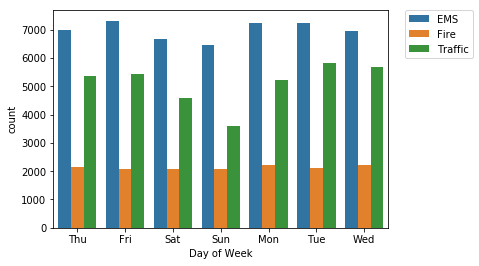

In [17]:
sns.countplot(df['Day of Week'],hue=df['Reason'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

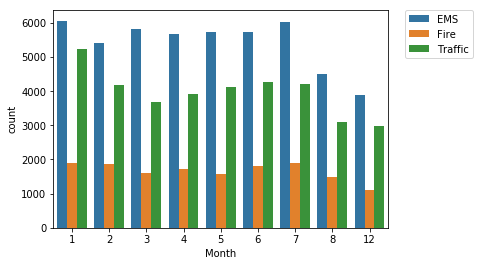

In [18]:
sns.countplot(df['Month'],hue=df['Reason'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a simple plot from the dataframe indicating the count of calls per month. **

Text(0, 0.5, 'Count')

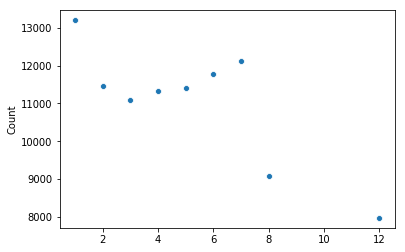

In [19]:
sns.scatterplot(x=df['Month'].value_counts().index,y=df['Month'].value_counts())
plt.ylabel('Count')
# plt.scatter(df['Month'].value_counts().index,df['Month'].value_counts())

** Now see if you can create a linear fit on the number of calls per month. **

Text(0, 0.5, 'Count')

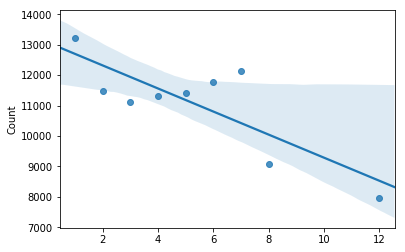

In [21]:
sns.regplot(x=list(df['Month'].value_counts().index),y=df['Month'].value_counts())
plt.ylabel('Count')

**Create a new column called 'Date' that contains the date from the timeStamp column. ** 

In [22]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** Now create a plot of counts of 911 calls per date.**

Text(0.5, 1.0, '911 calls per date')

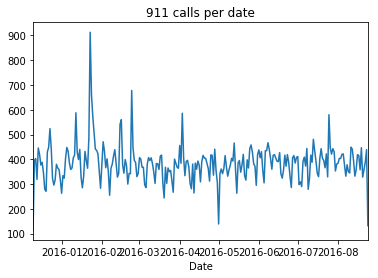

In [23]:
df.groupby('Date').count()['twp'].plot()
plt.title('911 calls per date')

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

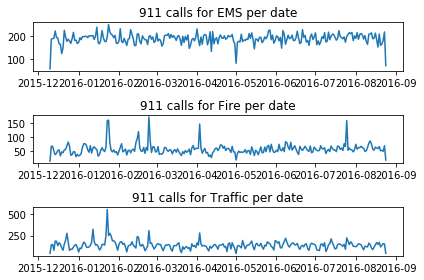

In [24]:
# sns.catplot(x='Date',data=df,col='Reason',kind='count')
fig, axes=plt.subplots(3,1)

axes[0].set_title('911 calls for EMS per date')
axes[0].plot(df[df['Reason']=='EMS'].groupby('Date').count()['twp'])
axes[1].set_title('911 calls for Fire per date')
axes[1].plot(df[df['Reason']=='Fire'].groupby('Date').count()['twp'])
axes[2].set_title('911 calls for Traffic per date')
axes[2].plot(df[df['Reason']=='Traffic'].groupby('Date').count()['twp'])
fig.tight_layout()

# Part 2: Finance Data Project

In this part you'll focus on exploratory data analysis of stock prices. We'll focus on bank stocks and see how they progressed throughout the financial criss all the way to early 2016.

## Get the Data

** To use pandas to directly read data from Morningstar, you'll need to install pandas-datareader library. Install the library by going to your terminal or command prompt and typing: **

conda install pandas-datareader

First you need to start with the proper imports, which I've already laid out for you here.

### The Imports

Already filled out for you.

In [56]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set the six banks to be included in a dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use Yahoo finance as a source, for example:**
    
    # Bank of America
    BAC = web.DataReader("BAC", 'yahoo', start, end)

In [57]:
start=datetime.datetime(2006, 1, 1)
end=datetime.datetime(2016, 1, 1)
# df=web.DataReader(['BAC','C','GS','JPM','MS','WFC'],'morningstar',start,end)
# morningstar is not avaliable now, and there may be some difference in the data
df=web.DataReader(['BAC','C','GS','JPM','MS','WFC'],'yahoo',start,end)
df.head()

Attributes       High                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  47.180000  493.799988  129.440002  40.360001  58.490002   
2006-01-04  47.240002  491.000000  128.910004  40.139999  59.279999   
2006-01-05  46.830002  487.799988  127.320000  39.810001  58.590000   
2006-01-06  46.910000  489.000000  129.250000  40.240002  58.849998   
2006-01-09  46.970001  487.399994  130.619995  40.720001  59.290001   

Attributes                   Low                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  31.975000  46.150002  481.100006  124.230003  39.299999  ...   
2006-01-04  31.820000  46.450001  483.500000  126.379997  39.419998  ...   
2006-01-05  31.555000  46.320000  484.000000  125.610001  39.500000  ...   
2006-01-06  31.775000  46.349998  482.000000  127.290001  39.549999  ...   
2006-01-09  31.825001  46.360001  483.000000  128.000000  39.880001  ...   

Attributes     Volume                                     Adj Close  \
Symbols            GS         JPM         MS         WFC        BAC   
Date                                                                  
2006-01-03  6188700.0  12838600.0  5377000.0  11016400.0  36.147552   
2006-01-04  4861600.0  13491500.0  7977800.0  10870000.0  35.763645   
2006-01-05  3717400.0   8109400.0  5778000.0  10158000.0  35.809727   
2006-01-06  4319600.0   7966900.0  6889800.0   8403800.0  35.755962   
2006-01-09  4723500.0  16575200.0  4144500.0   5619600.0  35.779007   

Attributes                                                           
Symbols              C          GS        JPM         MS        WFC  
Date                                                                 
2006-01-03  458.047638  110.020134  28.418390  38.834549  21.693670  
2006-01-04  449.590973  108.500519  28.254372  38.861198  21.442055  
2006-01-05  451.821289  108.457832  28.339947  38.967754  21.418251  
2006-01-06  451.821289  109.994522  28.539614  39.007713  21.544062  
2006-01-09  449.683960  111.317825  29.003166  39.420616  21.540665  

[5 rows x 36 columns]

** Investigate the data. What kind of variables are avaiable? **

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 36 columns):
(High, BAC)         2517 non-null float64
(High, C)           2517 non-null float64
(High, GS)          2517 non-null float64
(High, JPM)         2517 non-null float64
(High, MS)          2517 non-null float64
(High, WFC)         2517 non-null float64
(Low, BAC)          2517 non-null float64
(Low, C)            2517 non-null float64
(Low, GS)           2517 non-null float64
(Low, JPM)          2517 non-null float64
(Low, MS)           2517 non-null float64
(Low, WFC)          2517 non-null float64
(Open, BAC)         2517 non-null float64
(Open, C)           2517 non-null float64
(Open, GS)          2517 non-null float64
(Open, JPM)         2517 non-null float64
(Open, MS)          2517 non-null float64
(Open, WFC)         2517 non-null float64
(Close, BAC)        2517 non-null float64
(Close, C)          2517 non-null float64
(Close, GS)         2517 non-null f

Let's explore the data a bit! 

** What is the max Close price for each bank's stock throughout the time period?**

In [28]:
df['Close'].max()

Symbols
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [43]:
returns=pd.DataFrame()
returns=df['Close']/df['Close'].shift(1)-1
returns.head()

Symbols,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. Is there any stock which stands out to you? If so, can you figure out why?**

C:\datascience\anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\datascience\anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


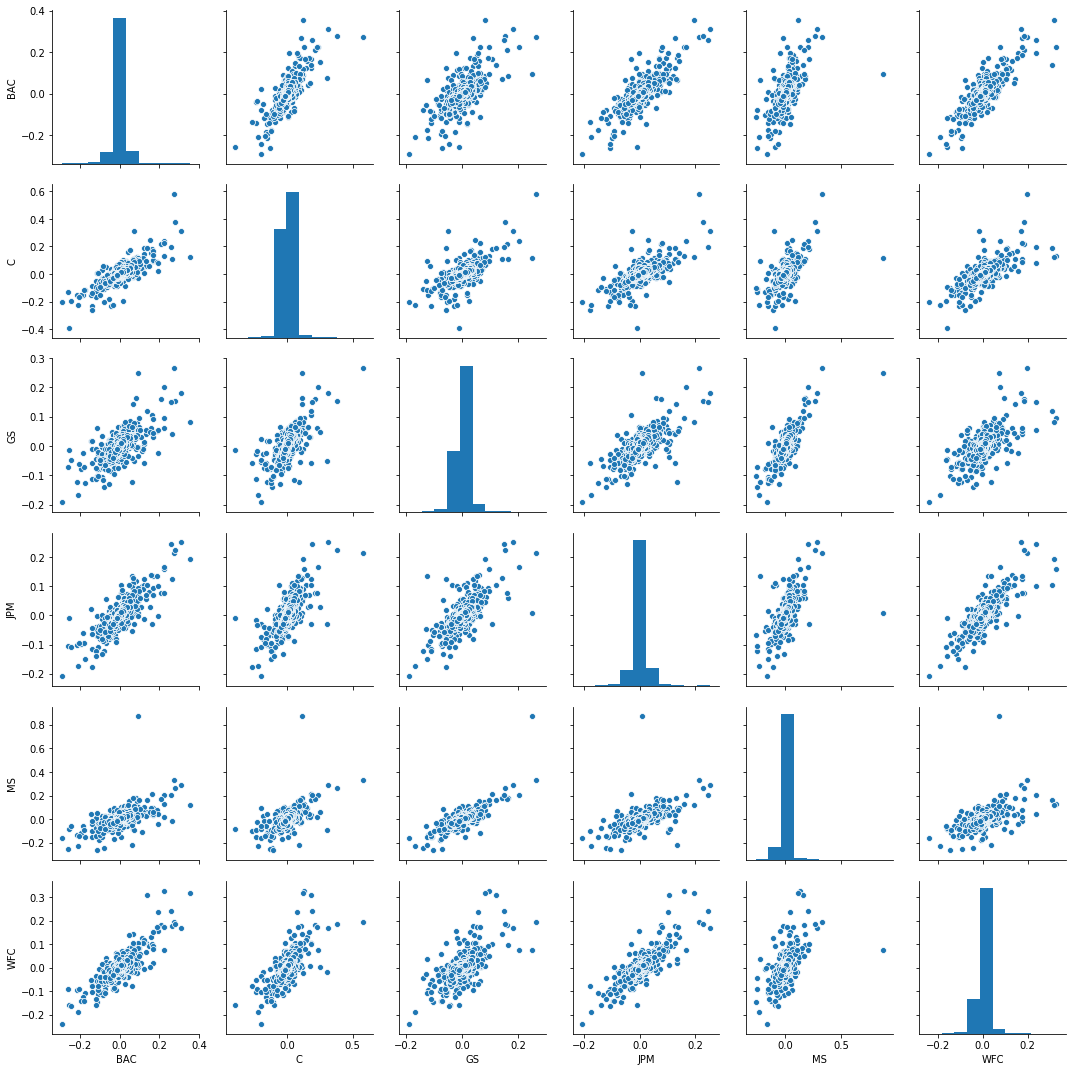

In [68]:
sns.pairplot(returns) # No outstanding stock from the plot

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. Do you notice anything special? **

In [64]:
returns.idxmin()

Symbols
BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

In [61]:
returns.min()

Symbols
BAC   -0.289694
C     -0.390244
GS    -0.189596
JPM   -0.207274
MS    -0.258929
WFC   -0.238223
dtype: float64

In [62]:
returns.idxmax()

Symbols
BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

In [63]:
returns.max()

Symbols
BAC    0.352691
C      0.578249
GS     0.264678
JPM    0.250967
MS     0.869835
WFC    0.327645
dtype: float64

In [ ]:
# financial crisis in late 2008 and early 2009, all the best and worst single day returns happen in late 2018 or early 2019, and 4 of the 6 worst single day returns happen on Jan 20, 2019.

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [38]:
returns.std() # CitiGroup has the highest std over the entire time period

Symbols
BAC    0.036647
C      0.038672
GS     0.025390
JPM    0.027667
MS     0.037819
WFC    0.030238
dtype: float64

In [39]:
returns[np.logical_and(returns.index>='2015-01-01',returns.index<='2015-12-31')].std() # Morgan Stanley has the highest std in 2015

Symbols
BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

** Create a distplot of the 2015 returns for Morgan Stanley **

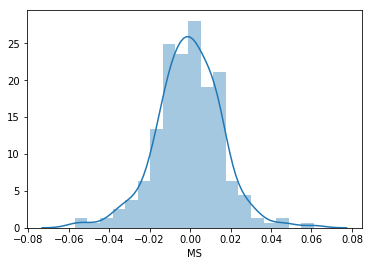

In [33]:
sns.distplot(returns[np.logical_and(returns.index>='2015-01-01',returns.index<='2015-12-31')]['MS'])

** Create a distplot of the 2008 returns for CitiGroup **

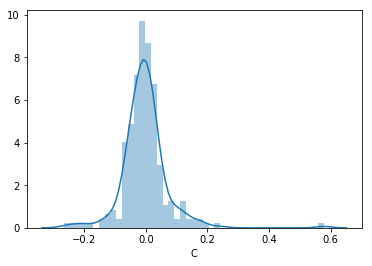

In [34]:
sns.distplot(returns[np.logical_and(returns.index>='2008-01-01',returns.index<='2008-12-31')]['C'])

** Create a line plot showing Close price for each bank for the entire index of time. **

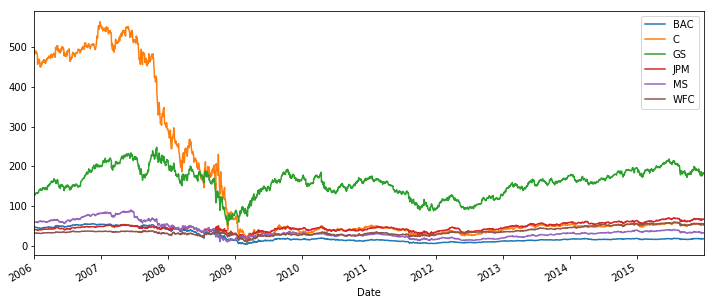

In [47]:
df['Close'].plot(figsize=(12,5))
plt.legend()

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

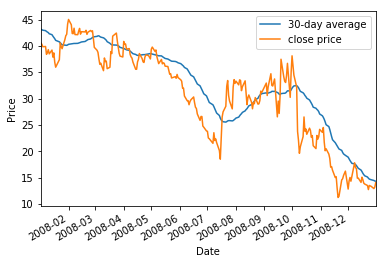

In [72]:
# when counting the 30-day average price in the first 30 days of 2008, we user the data in 2007 
begin=datetime.datetime(2008,1,1)
end=datetime.datetime(2008,12,31)
df['Close']['BAC'].rolling(30).mean()[np.logical_and(df.index>=begin,df.index<=end)].plot(label='30-day average')
df['Close']['BAC'][np.logical_and(df.index>=begin,df.index<=end)].plot(label='close price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()